In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression


In [ ]:
iris = load_iris(as_frame=True)
df = pd.DataFrame(iris.data)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace=[0, 1, 2], value=['setosa', 'versicolor', 'virginica'])

In [ ]:
class MyLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        return X @ self.coefficients

    def get_coefficients(self):
        return self.coefficients

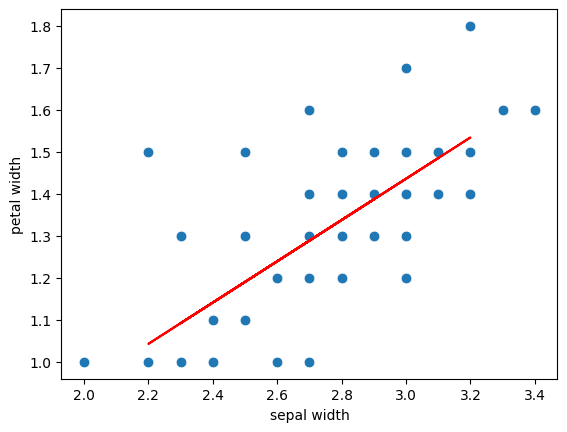

In [ ]:
versicolor_df = df[df['species'] == 'versicolor']

X = versicolor_df[['sepal width (cm)']]
y = versicolor_df['petal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y)

my_model = MyLinearRegression()
my_model.fit(X_train, y_train)

y_pred_my_model = my_model.predict(X_test)

sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', data=versicolor_df, s=60)
plt.plot(X_test, y_pred_my_model, color='red')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()

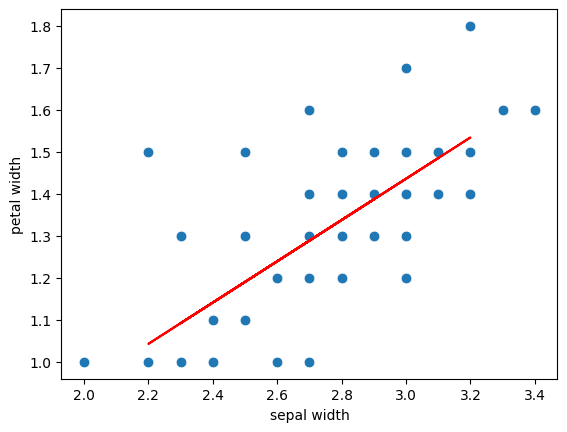

In [ ]:

sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

y_pred_sklearn_model = sklearn_model.predict(X_test)

sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', data=versicolor_df, s=60)
plt.plot(X_test, y_pred_sklearn_model, color='red')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()

In [ ]:
mse_my_model = mean_squared_error(y_test, y_pred_my_model)
r2_my_model = r2_score(y_test, y_pred_my_model)
mae_my_model = mean_absolute_error(y_test, y_pred_my_model)

mse_sklearn_model = mean_squared_error(y_test, y_pred_sklearn_model)
r2_sklearn_model = r2_score(y_test, y_pred_sklearn_model)
mae_sklearn_model = mean_absolute_error(y_test, y_pred_sklearn_model)

print(f"Моя модель MSE: {mse_my_model}")
print(f"Моя модель R2: {r2_my_model}")
print(f"Моя модель MAE: {mae_my_model}")

print(f"Модель из библиотеки MSE: {mse_sklearn_model}")
print(f"Модель из библиотеки R2: {r2_sklearn_model}")
print(f"Модель из библиотеки MAE: {mae_sklearn_model}")

##Судя по метрикам, модели почти одинаковые


Моя модель MSE: 0.0254398407378063
Моя модель R2: 0.018417103952222402
Моя модель MAE: 0.11239216391085557
Модель из библиотеки MSE: 0.025439840737806176
Модель из библиотеки R2: 0.018417103952227176
Модель из библиотеки MAE: 0.11239216391085545
